In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from skimpy import skim
import seaborn as sns

In [3]:
df=pd.read_csv(r'extended_data.csv')

In [4]:
df

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,d9143864-a066-486b-b03a-f5ed5d75c309,2024-10-19 08:45:00,Aditya Mehta,4462116922@okaxis,Sai Reddy,8917922022@okaxis,5516.59,FAILED
1,49ffd909-1ea0-48a9-98cd-0ce74cf647c1,2024-06-18 06:27:00,Lakshya Kumar,0338057199@okaxis,Anaya Mehta,2527016608@okaxis,4344.40,FAILED
2,deb78da5-de6e-428b-997b-2e21c1bb38a4,2024-06-07 21:32:00,Aarav Patel,2587110868@oksbi,Arjun Roy,2939615956@okaxis,6053.47,SUCCESS
3,46a3e969-aafc-4ec1-9636-45fd4f875a94,2024-08-04 08:54:00,Vihaan Patel,0851187428@okhdfcbank,Anaya Sharma,1710638945@okaxis,1178.30,SUCCESS
4,ab263234-f989-4f23-a415-5bacf26ed4c8,2024-09-19 06:47:00,Aditya Roy,1217672526@okaxis,Diya Mehta,7167927152@okaxis,3149.08,SUCCESS
...,...,...,...,...,...,...,...,...
299995,a74cc492-785a-4324-ab97-1b488e5cb60a,2024-06-18 14:59:00,Vivaan Gupta,4725892392@okaxis,Arjun Singh,8605606173@okybl,8581.09,SUCCESS
299996,8eff2ba3-1c02-4c58-81cc-5befce2999e3,2024-06-18 05:44:00,Kian Verma,1813912642@okaxis,Lakshya Sharma,7593875756@okaxis,659.99,SUCCESS
299997,7b34f09e-90a5-4a25-86ce-5f01c6649c2a,2024-07-24 21:46:00,Lakshya Reddy,0485709858@okybl,Vihaan Sharma,3087494960@okaxis,4525.40,SUCCESS
299998,25fb64c2-6040-43d3-9855-ce411519f622,2024-08-08 19:45:00,Anaya Roy,3883288077@okaxis,Vihaan Jha,5516052009@okicici,9256.15,SUCCESS


In [5]:
df.columns

Index(['Transaction ID', 'Timestamp', 'Sender Name', 'Sender UPI ID',
       'Receiver Name', 'Receiver UPI ID', 'Amount (INR)', 'Status'],
      dtype='object')

In [6]:
df['Status'].value_counts()

Status
SUCCESS    230987
FAILED      69013
Name: count, dtype: int64

1. Now I will extract day,time,month and year from transaction timestamp.
2. I will extract upi id after @ for both reciever as well as sender.
3. I will drop Transaction Id, Reciever name and Sender Name from df.

In [7]:
# skim(df)

In [8]:
df.drop(columns=['Transaction ID','Sender Name','Receiver Name'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        300000 non-null  object 
 1   Sender UPI ID    300000 non-null  object 
 2   Receiver UPI ID  300000 non-null  object 
 3   Amount (INR)     300000 non-null  float64
 4   Status           300000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 11.4+ MB


# Data Preprocessing

In [10]:
def get_year(row):
    return row[:4]
def get_month(row):
    return row[5:7]
def get_day(row):
    return row[8:10]

In [11]:
df['Year']=df['Timestamp'].apply(get_year)
df['Month']=df['Timestamp'].apply(get_month)
df['Day']=df['Timestamp'].apply(get_day)

In [12]:
df['Year']=df['Year'].astype('int')
df['Month']=df['Month'].astype('int')
df['Day']=df['Day'].astype('int')

In [13]:
print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Day'].value_counts())

Year
2024    300000
Name: count, dtype: int64
Month
7     123055
6     121399
8      35313
10      2403
1       2354
12      2328
3       2260
5       2255
4       2225
9       2220
2       2095
11      2093
Name: count, dtype: int64
Day
6     12781
5     12760
4     12745
8     12708
7     12679
3     12675
1     12630
2     12499
9     10590
23     8918
17     8910
16     8891
28     8866
21     8836
11     8831
12     8815
25     8809
24     8794
18     8790
22     8726
27     8720
14     8703
10     8683
13     8669
19     8640
26     8631
30     8592
20     8585
29     8572
15     8556
31     4396
Name: count, dtype: int64


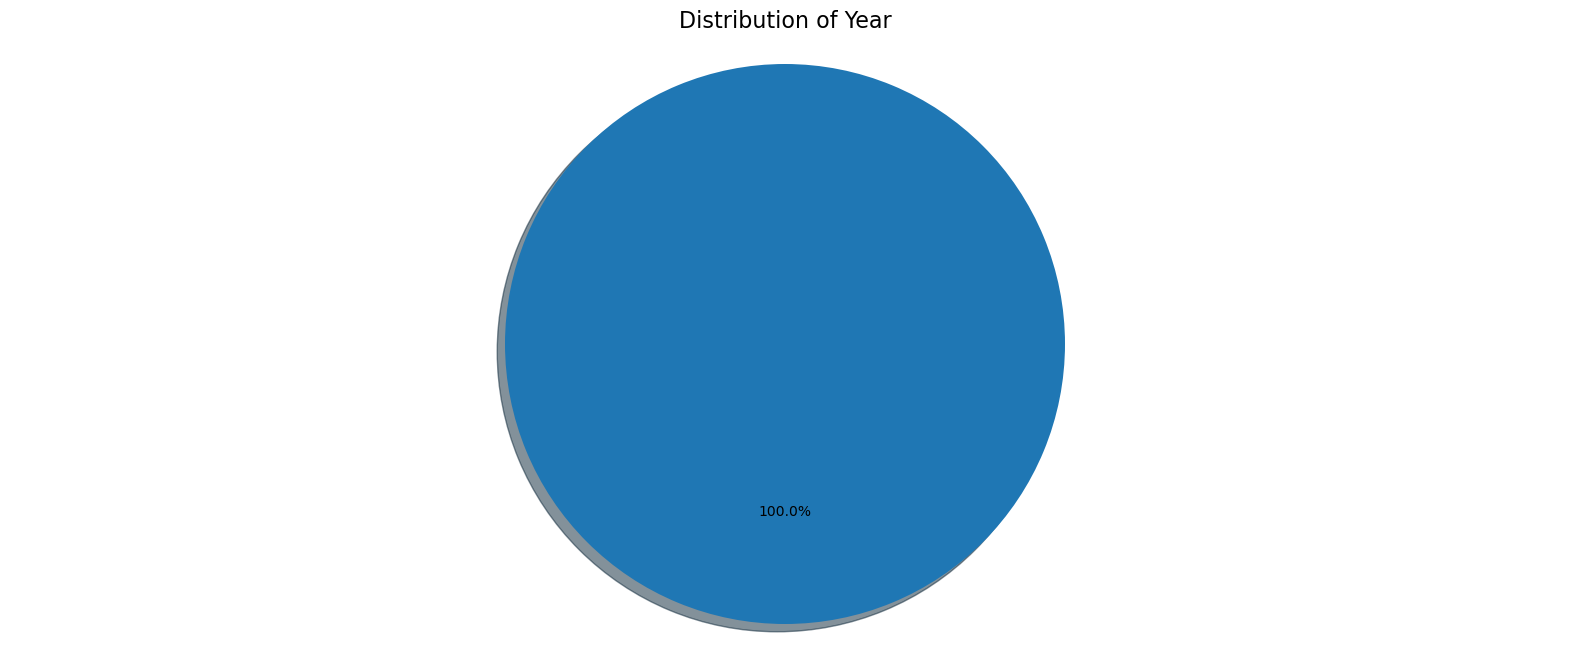

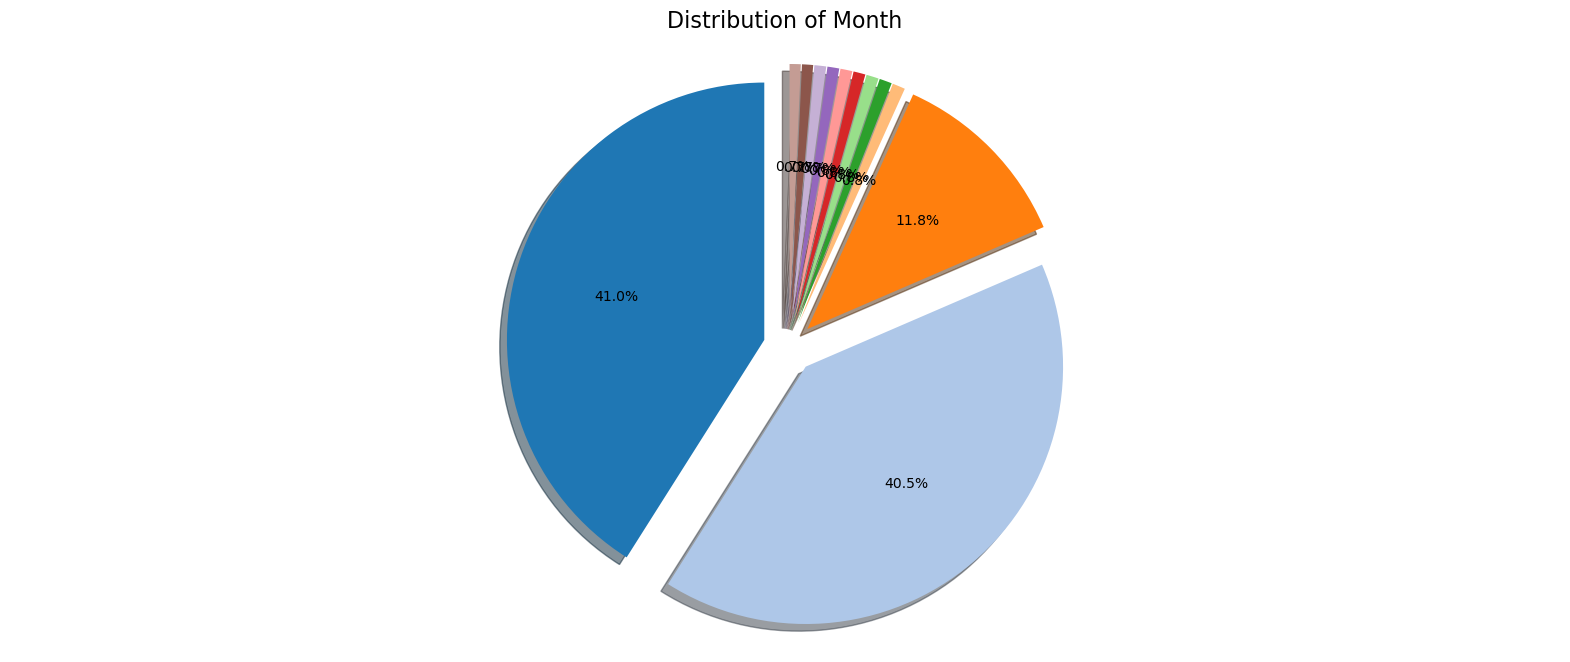

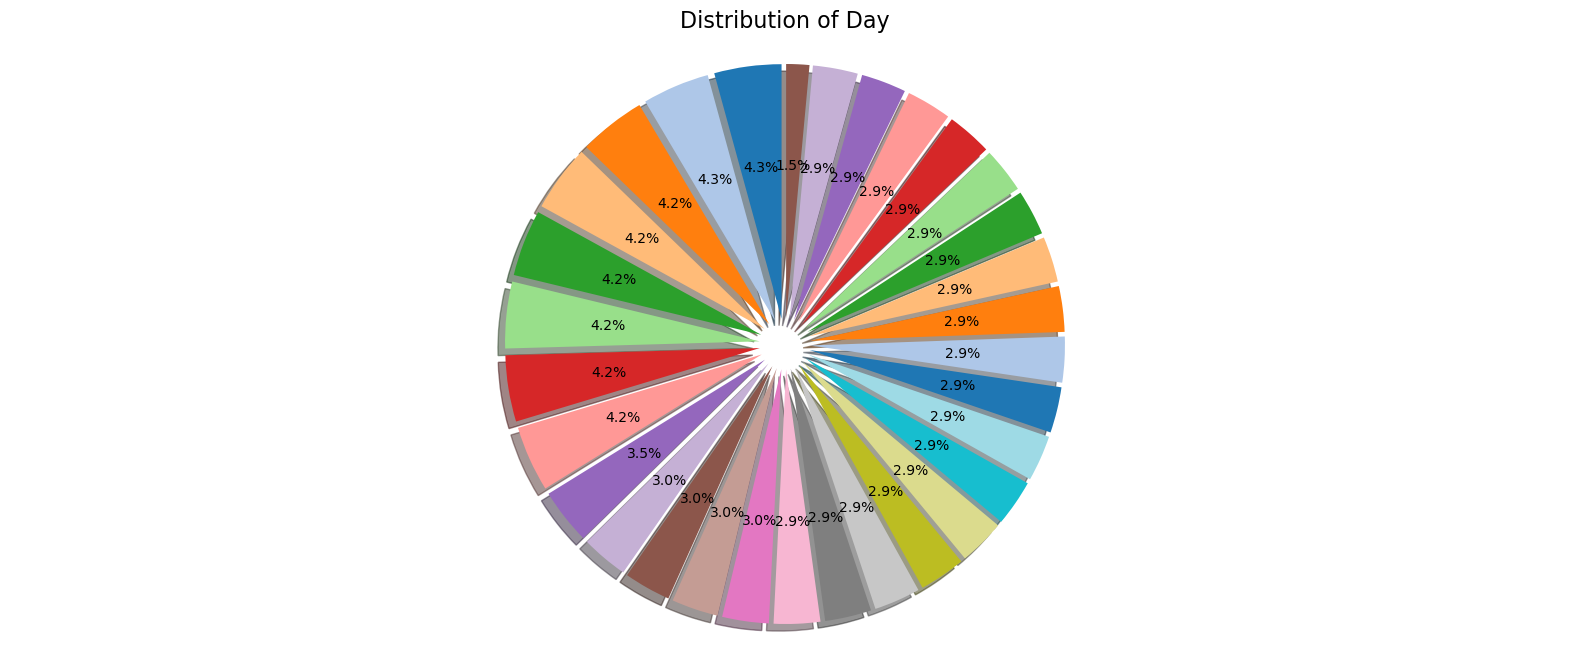

In [14]:
import matplotlib.pyplot as plt

# Iterate over integer columns in the DataFrame
for i in df.select_dtypes(include='int'):
    plt.figure(figsize=(20, 8))  # Adjusted height for better visibility
    plt.pie(
        df[i].value_counts(),
        autopct='%1.1f%%',  # Percentage display format
        startangle=90,  # Start angle for the pie chart
        shadow=True,  # Add shadow for depth
        colors=plt.cm.tab20.colors,  # Color palette for different segments
        explode=[0.1] * len(df[i].value_counts())  # Slightly separate each slice
    )
    plt.title(f'Distribution of {i}', fontsize=16)  # Title for the pie chart
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()  # Display the pie chart


In [15]:
df['Timestamp']=df['Timestamp'].apply(lambda x: pd.to_datetime(x))

In [16]:
def get_hours(row):
    return row.hour
def get_minutes(row):
    return row.minute

In [17]:
df['Hour']=df['Timestamp'].apply(get_hours)
df['Minute']=df['Timestamp'].apply(get_minutes)

In [18]:
df.drop(columns=['Year','Month','Timestamp'],inplace=True)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


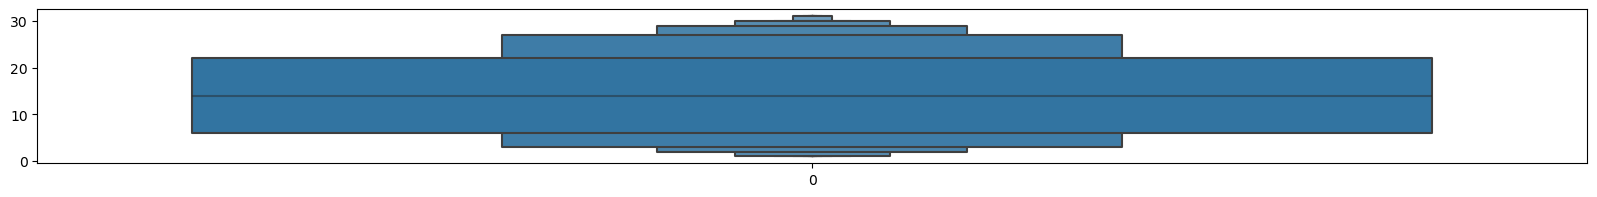

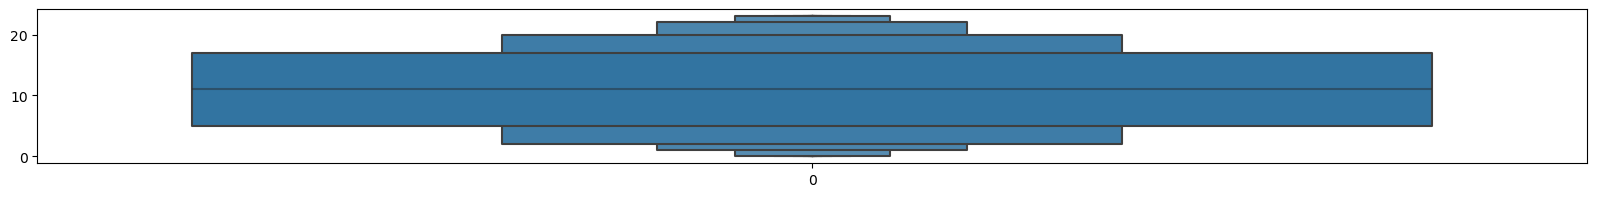

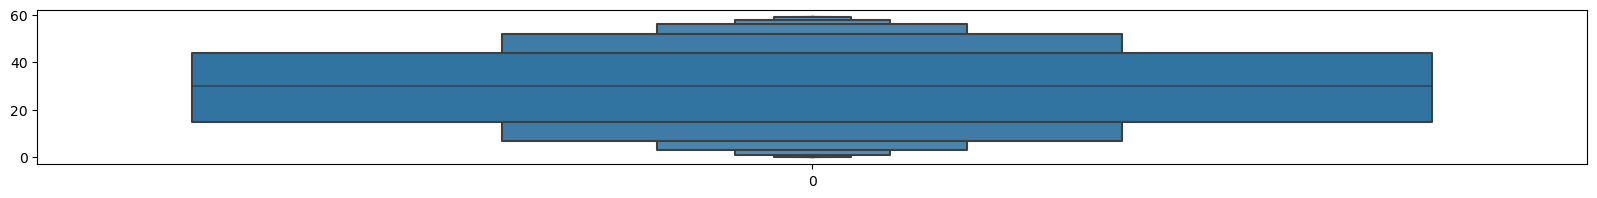

In [19]:
for i in df.select_dtypes(include='int'):
    plt.figure(figsize=(20,2))
    sns.boxenplot(df[i])

In [20]:
def get_upi(row):
    indx=row.index('@')
    return row[indx+1:]

In [21]:
df['Sender']=df['Sender UPI ID'].apply(get_upi)
df['Receiver']=df['Receiver UPI ID'].apply(get_upi)

In [22]:
df.drop(columns=['Sender UPI ID','Receiver UPI ID'],inplace=True)

In [23]:
df

,Amount (INR),Status,Day,Hour,Minute,Sender,Receiver
0,5516.59,FAILED,19,8,45,okaxis,okaxis
1,4344.40,FAILED,18,6,27,okaxis,okaxis
2,6053.47,SUCCESS,7,21,32,oksbi,okaxis
3,1178.30,SUCCESS,4,8,54,okhdfcbank,okaxis
4,3149.08,SUCCESS,19,6,47,okaxis,okaxis
...,...,...,...,...,...,...,...
299995,8581.09,SUCCESS,18,14,59,okaxis,okybl
299996,659.99,SUCCESS,18,5,44,okaxis,okaxis
299997,4525.40,SUCCESS,24,21,46,okybl,okaxis
299998,9256.15,SUCCESS,8,19,45,okaxis,okicici


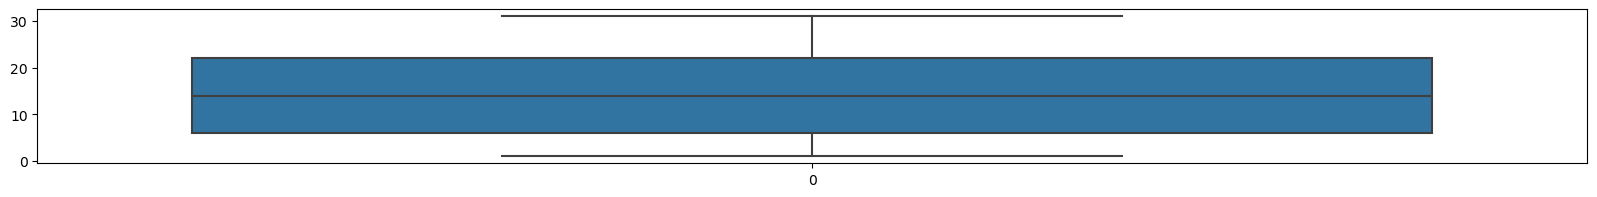

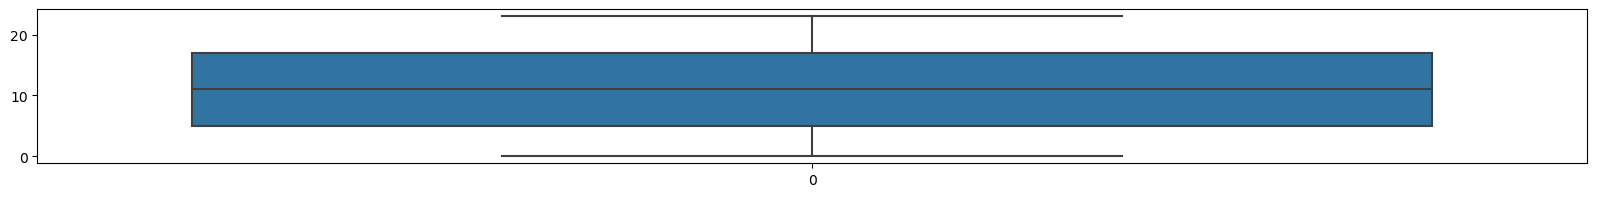

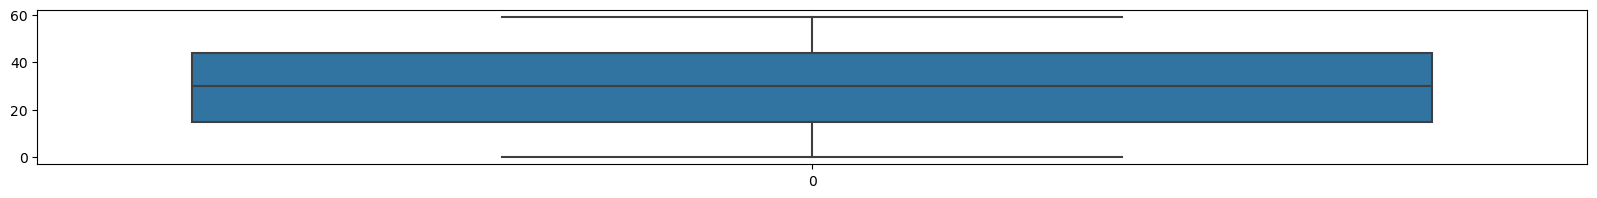

In [24]:
for i in df.select_dtypes(include='int'):
    plt.figure(figsize=(20,2))
    sns.boxplot(df[i])

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
le=LabelEncoder()
df['Status']=le.fit_transform(df['Status'])
df['Sender']=le.fit_transform(df['Sender'])
df['Receiver']=le.fit_transform(df['Receiver'])

In [29]:
df

,Amount (INR),Status,Day,Hour,Minute,Sender,Receiver
0,5516.59,0,19,8,45,0,0
1,4344.40,0,18,6,27,0,0
2,6053.47,1,7,21,32,3,0
3,1178.30,1,4,8,54,1,0
4,3149.08,1,19,6,47,0,0
...,...,...,...,...,...,...,...
299995,8581.09,1,18,14,59,0,4
299996,659.99,1,18,5,44,0,0
299997,4525.40,1,24,21,46,4,0
299998,9256.15,1,8,19,45,0,2


In [73]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Sender', 'Receiver']

In [74]:
encoder=OneHotEncoder(sparse_output=False,drop='first')
ohe_data=encoder.fit_transform(df[categorical_columns])

In [75]:
new_df=pd.DataFrame(ohe_data,columns=encoder.get_feature_names_out(categorical_columns))

In [76]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, new_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [77]:
df_encoded

,Amount (INR),Status,Day,Hour,Minute,Sender_okhdfcbank,Sender_okicici,Sender_oksbi,Sender_okybl,Receiver_okhdfcbank,Receiver_okicici,Receiver_oksbi,Receiver_okybl
0,3907.340000,0,22,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8404.550000,1,19,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,941.880000,1,4,4,56,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,8926.000000,1,9,9,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2800.550000,1,25,8,38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110995,317.595193,1,9,10,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110996,4989.205795,1,9,10,36,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110997,1150.815901,0,9,10,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110998,4401.719444,1,9,10,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_encoded.corr()

,Amount (INR),Status,Day,Hour,Minute,Sender_okhdfcbank,Sender_okicici,Sender_oksbi,Sender_okybl,Receiver_okhdfcbank,Receiver_okicici,Receiver_oksbi,Receiver_okybl
Amount (INR),1.000000,0.004089,0.004800,0.001265,0.000063,0.004611,0.002520,0.003529,0.002057,-0.001357,0.000396,-0.001110,0.005406
Status,0.004089,1.000000,-0.013194,-0.003744,-0.004063,0.003457,0.003311,0.002365,0.000237,-0.000164,-0.004782,0.003255,-0.000516
Day,0.004800,-0.013194,1.000000,0.003652,0.001239,-0.001646,-0.000911,0.002691,0.002745,-0.002706,0.000525,-0.000222,0.003166
Hour,0.001265,-0.003744,0.003652,1.000000,0.001460,0.000004,-0.002763,-0.002840,0.000675,-0.005028,0.003539,0.001009,0.001522
Minute,0.000063,-0.004063,0.001239,0.001460,1.000000,-0.004556,-0.005835,-0.004302,-0.001412,0.002632,0.001850,-0.002405,0.002408
Sender_okhdfcbank,0.004611,0.003457,-0.001646,0.000004,-0.004556,1.000000,-0.018272,-0.018858,-0.017759,0.010307,0.017020,0.017862,0.017275
Sender_okicici,0.002520,0.003311,-0.000911,-0.002763,-0.005835,-0.018272,1.000000,-0.019120,-0.018005,0.017559,0.019870,0.018163,0.017052
Sender_oksbi,0.003529,0.002365,0.002691,-0.002840,-0.004302,-0.018858,-0.019120,1.000000,-0.018583,0.016338,0.014680,0.023451,0.014414
Sender_okybl,0.002057,0.000237,0.002745,0.000675,-0.001412,-0.017759,-0.018005,-0.018583,1.000000,0.023675,0.016739,0.015476,0.021667
Receiver_okhdfcbank,-0.001357,-0.000164,-0.002706,-0.005028,0.002632,0.010307,0.017559,0.016338,0.023675,1.000000,-0.018764,-0.018648,-0.019042


# Splitting X and Y

In [30]:
# X=df_encoded.drop(columns=['Status'])
# y=df_encoded['Status']
X=df.drop(columns=['Status'])
y=df['Status']

In [31]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_res,y_res=sm.fit_resample(X,y)

In [32]:
x_res

,Amount (INR),Day,Hour,Minute,Sender,Receiver
0,5516.590000,19,8,45,0,0
1,4344.400000,18,6,27,0,0
2,6053.470000,7,21,32,3,0
3,1178.300000,4,8,54,1,0
4,3149.080000,19,6,47,0,0
...,...,...,...,...,...,...
461969,3776.026252,8,11,47,0,0
461970,6871.286357,1,8,27,0,0
461971,7927.206812,13,10,20,0,0
461972,7674.544900,28,7,40,0,0


In [33]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=2024)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((369579, 6), (92395, 6), (369579,), (92395,))

In [35]:
y_test

258338    1
71209     1
325219    0
366865    0
277223    0
         ..
134570    1
290096    1
23717     1
124354    0
142256    1
Name: Status, Length: 92395, dtype: int64

In [36]:
X_test.to_csv('xdata.csv')
y_test.to_csv('ydata.csv')
y_train.to_csv('y_train.csv')
X_train.to_csv('X_train.csv')

In [37]:
X_train.columns

Index(['Amount (INR)', 'Day', 'Hour', 'Minute', 'Sender', 'Receiver'], dtype='object')

In [38]:
X_train['Day'].value_counts()

Day
6     16154
5     16009
4     15995
3     15824
7     15673
2     15488
8     15262
1     14295
9     13098
24    11635
25    11401
21    11370
23    11350
26    11321
27    11235
10    11022
16    10998
11    10971
17    10955
28    10928
22    10927
14    10924
18    10919
20    10866
19    10824
12    10768
15    10611
13    10568
29     9962
30     8495
31     3731
Name: count, dtype: int64

In [39]:
# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [40]:
X_test

,Amount (INR),Day,Hour,Minute,Sender,Receiver
258338,7502.230000,17,9,43,0,0
71209,6308.560000,30,21,29,0,0
325219,8567.534125,18,12,53,2,0
366865,4264.721527,6,15,50,0,1
277223,461.490000,28,19,40,3,1
...,...,...,...,...,...,...
134570,5414.390000,18,1,51,0,0
290096,143.390000,12,12,37,0,0
23717,4924.280000,13,17,34,1,0
124354,2659.440000,8,14,51,0,0


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Model Building and Evaluation

In [49]:
#import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
#prediction
rf_pred = rf.predict(X_test)
#accuracy score
rf_acc = accuracy_score(y_test,rf_pred)
print("Accuracy Score of RandomForest= ",rf_acc)
print('====================================================')
#finding the f1 score
rf_f1 = f1_score(y_test,rf_pred)
print("f1 score score fo RandomForest =",rf_f1)
print('====================================================')
rf_pre = precision_score(y_test,rf_pred)
print('precision_score of RandomForest is=',rf_pre)
print('====================================================')
#recall_score
rf_rec = recall_score(y_test,rf_pred)
print('recall_score of RandomForest is =',rf_rec)
print('===================================================')
#confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred) 
print('coonfusion matrxi of RandomForest =\n',rf_cm)
print('===================================================')


Accuracy Score of RandomForest=  0.862784782726338
f1 score score fo RandomForest = 0.8646640619996157
precision_score of RandomForest is= 0.8521830615465544
recall_score of RandomForest is = 0.877516087794943
coonfusion matrxi of RandomForest =
 [[39217  7025]
 [ 5653 40500]]


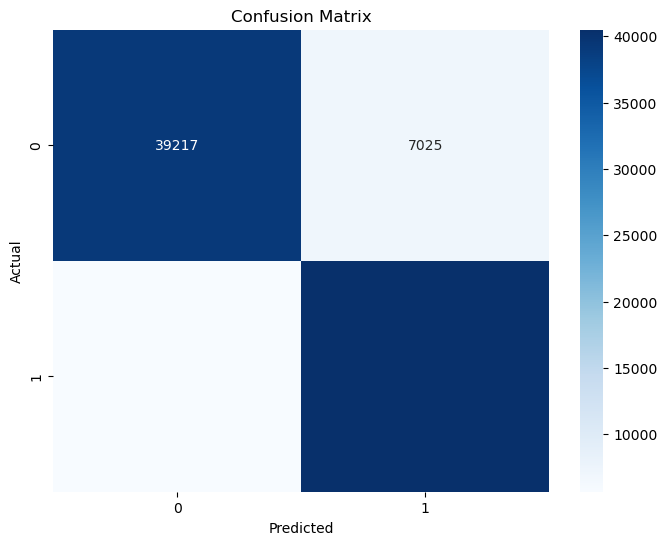

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# Initialize the RandomForestClassifier with refined parameters
rf = RandomForestClassifier(
    n_estimators=500,         # Increased number of trees for robustness
    max_depth=40,             # Allow deeper trees
    min_samples_split=5,      # Minimum samples required to split a node
    min_samples_leaf=2,       # Minimum samples required to be at a leaf node
    max_features='sqrt',      # Square root of features for splitting
    criterion='entropy',      # Use entropy for splitting
    bootstrap=True,           # Enable bootstrapping
    class_weight='balanced',  # Handle class imbalance
    random_state=42           # Ensure reproducibility
)


# Train the model
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)

# Evaluation Metrics
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_pre = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Print Evaluation Metrics
print("Accuracy Score of Random Forest:", rf_acc)
print("F1 Score of Random Forest:", rf_f1)
print("Precision Score of Random Forest:", rf_pre)
print("Recall Score of Random Forest:", rf_rec)
print("Confusion Matrix of Random Forest:\n", rf_cm)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score,precision_score,recall_score
knn = KNeighborsClassifier()
#fitting to the model
knn.fit(X_train,y_train)
#predicton
knn_pred = knn.predict(X_test)
#accuracy score 
knn_acc = accuracy_score(y_test,knn_pred)
print("Accuracy Score of KNeighborsClassifier= ",knn_acc)
print('====================================================')
#finding the f1 score
knn_f1 = f1_score(y_test,knn_pred,average='macro')
print("f1 score score fo KNeighborsClassifier =",knn_f1)
print('====================================================')
knn_pre = precision_score(y_test,knn_pred,average='macro')
print('precision_score of KNeighborsClassifier is=',knn_pre)
print('====================================================')
#recall_score
knn_rec = recall_score(y_test,knn_pred,average='macro')
print('recall_score of KNeighborsClassifier is =',knn_rec)
print('===================================================')
#confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred) 
print('coonfusion matrxi of KNeighborsClassifier =\n',knn_cm)
print('===================================================')


Accuracy Score of KNeighborsClassifier=  0.7239461009794902
f1 score score fo KNeighborsClassifier = 0.7184588216321832
precision_score of KNeighborsClassifier is= 0.7425946409497759
recall_score of KNeighborsClassifier is = 0.7238122952370039
coonfusion matrxi of KNeighborsClassifier =
 [[39894  6348]
 [19158 26995]]


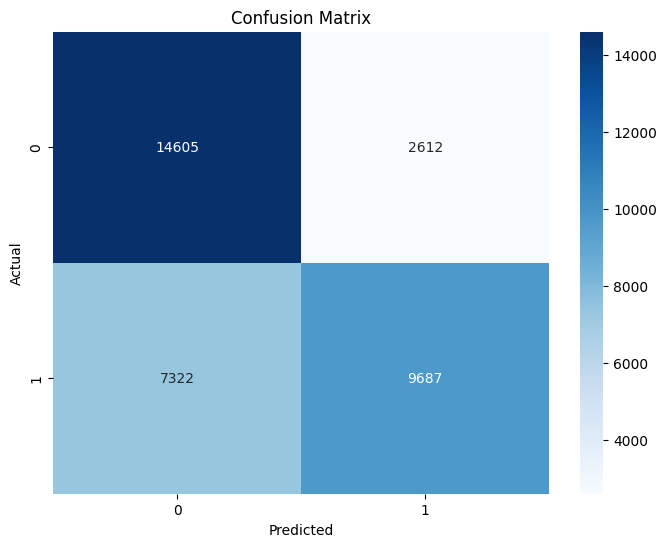

In [103]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
#import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
#prediction
lr_pred = lr.predict(X_test)
#accuracy score
lr_acc = accuracy_score(y_test,lr_pred)
print("Accuracy Score of logistic reggression = ",lr_acc)
print('====================================================')
#finding the f1 score
lr_f1 = f1_score(y_test,lr_pred)
print("f1 score score fo logistic reggression  =",lr_f1)
print('====================================================')
lr_pre = precision_score(y_test,lr_pred)
print('precision_score of logistic reggression  is=',lr_pre)
print('====================================================')
#recall_score
lr_rec = recall_score(y_test,lr_pred)
print('recall_score of logistic reggression  is =',lr_rec)
print('===================================================')
#confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred) 
print('coonfusion matrxi of logistic reggression  =\n',lr_cm)
print('===================================================')


Accuracy Score of logistic reggression =  0.5154824395259484
f1 score score fo logistic reggression  = 0.3117745630082863
precision_score of logistic reggression  is= 0.5366783105747857
recall_score of logistic reggression  is = 0.2197040279071783
coonfusion matrxi of logistic reggression  =
 [[37488  8754]
 [36013 10140]]


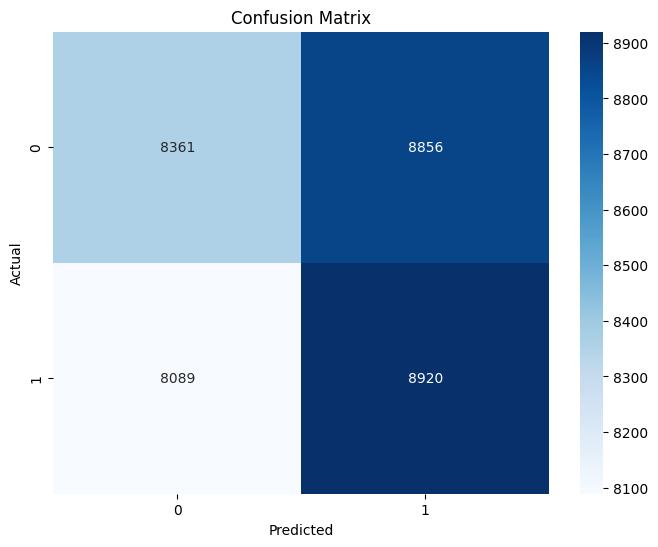

In [99]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
#import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
#prediction
dtc_pred = dtc.predict(X_test)
#accuracy score
dtc_acc = accuracy_score(y_test,dtc_pred)
print("Accuracy Score of DecisionTreeClassifier= ",dtc_acc)
print('====================================================')
#finding the f1 score
dtc_f1 = f1_score(y_test,dtc_pred)
print("f1 score score fo DecisionTreeClassifier =",dtc_f1)
print('====================================================')
dtc_pre = precision_score(y_test,dtc_pred)
print('precision_score of DecisionTreeClassifier is=',dtc_pre)
print('====================================================')
#recall_score
dtc_rec = recall_score(y_test,dtc_pred)
print('recall_score of DecisionTreeClassifier is =',dtc_rec)
print('===================================================')
#confusion matrix
dtc_cm = confusion_matrix(y_test, dtc_pred) 
print('coonfusion matrxi of DecisionTreeClassifier =\n',dtc_cm)
print('===================================================')


Accuracy Score of DecisionTreeClassifier=  0.7870555766004654
f1 score score fo DecisionTreeClassifier = 0.7865612219437845
precision_score of DecisionTreeClassifier is= 0.7876292691405231
recall_score of DecisionTreeClassifier is = 0.7854960674279029
coonfusion matrxi of DecisionTreeClassifier =
 [[36467  9775]
 [ 9900 36253]]


In [56]:
#import Libraries
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
#prediction
etc_pred = etc.predict(X_test)
#accuracy score
etc_acc = accuracy_score(y_test,etc_pred)
print("Accuracy Score of ExtraTreesClassifier = ",etc_acc)
print('====================================================')
#finding the f1 score
etc_f1 = f1_score(y_test,etc_pred)
print("f1 score score of ExtraTreesClassifier  =",etc_f1)
print('====================================================')
etc_pre = precision_score(y_test,etc_pred)
print('precision_score of ExtraTreesClassifier  is=',etc_pre)
print('====================================================')
#recall_score
etc_rec = recall_score(y_test,etc_pred)
print('recall_score of ExtraTreesClassifier  is =',etc_rec)
print('===================================================')
#confusion matrix
etc_cm = confusion_matrix(y_test, etc_pred) 
print('coonfusion matrxi of ExtraTreesClassifier  =\n',etc_cm)
print('===================================================')

Accuracy Score of DecisionTreeClassifier=  0.87465771957357
f1 score score fo DecisionTreeClassifier = 0.8760502178031316
precision_score of DecisionTreeClassifier is= 0.8656091370558375
recall_score of DecisionTreeClassifier is = 0.886746257014712
coonfusion matrxi of DecisionTreeClassifier =
 [[39888  6354]
 [ 5227 40926]]


In [104]:
new=[9769.81,25,2,16,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0]
prrd= knn.predict([new])

C:\Users\085\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [105]:
prrd

array([1])

In [106]:
sucess=[9341.93,7,13,27,0,0,1,0,0,1,0,0]

pred= et.predict([new])
print(pred)


[1]


C:\Users\085\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [107]:
import joblib
joblib.dump(rf,'rfk.joblib')
joblib.dump(dt,'dec.joblib')
joblib.dump(lr,'lrt.joblib')

['lrt.joblib']

In [108]:

new=[2434.9,	1,	8,	15,	0,	0,	0,	0,	0,	0,	0,	0]
pred = rf.predict([new])
pred

C:\Users\085\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [109]:
zero=[6644.74	,28	,5,	21	,0	,0	,1,	0,	0	,0,	0,	1]
pred1 = rf.predict([zero])
pred1

C:\Users\085\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [110]:
zero=[753.02,	4,	15	,16,	1	,0,	0,	0	,0,	0,0,0]
pred1 = rf.predict([zero])
pred1

C:\Users\085\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [101]:
import plotly.graph_objects as go

# Data for Models and their Accuracies

model_names = ['DecisionTree', 'RandomForest', 'svc', 'Exara tree Classifier','knn']
accuracies = [65,60,67,67,72]

# Create the bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=model_names,
    y=accuracies,
    name='Accuracy'
))

# Set the layout
fig.update_layout(
    title='Model Accuracies',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    barmode='group',
    bargroupgap=0.2
)

# Show the plot
fig.show()


In [ ]:
# # Import necessary libraries
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# import numpy as np

# # Define the parameter grid (search space) for Decision Tree
# param_dist = {
#     'max_depth': [None] + list(np.arange(1, 150)),  # Depth from 1 to 20 or None (no limit)
#     'min_samples_split': np.arange(2, 31, 2),  # Minimum samples required to split a node
#     'min_samples_leaf': np.arange(1, 21, 2),  # Minimum samples required at each leaf
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered at each split
# }

# # Initialize the DecisionTreeClassifier
# dt = DecisionTreeClassifier()

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=dt, 
#                                    param_distributions=param_dist, 
#                                    n_iter=100,  # Number of parameter settings sampled
#                                    cv=5,        # 3-fold cross-validation
#                                    verbose=2,   # Output verbosity
#                                    random_state=42,  # Seed for reproducibility
#                                    n_jobs=-1)   # Use all available cores

# # Fit RandomizedSearchCV to the training data
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters found
# print("Best Hyperparameters:", random_search.best_params_)

# # Use the best estimator to make predictions on the test set
# best_dt = random_search.best_estimator_
# y_pred = best_dt.predict(X_test)

# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# # Print a detailed classification report (Precision, Recall, F1-Score for each class)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Print the confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [ ]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# import numpy as np


# # Define the parameter grid (search space)
# param_dist = {
#     'n_estimators': np.arange(10, 1000, 100),  # Number of trees from 100 to 1000
#     'max_depth': [None] + list(np.arange(10, 110, 10)),  # Depth from 10 to 100 or None (no limit)
#     'min_samples_split': np.arange(2, 20, 2),  # Minimum samples required to split a node
#     'min_samples_leaf': np.arange(1, 20, 2),  # Minimum samples required at each leaf
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered at each split
#     'bootstrap': [True, False]  # Whether to use bootstrapped samples
# }

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier()

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rf, 
#                                    param_distributions=param_dist, 
#                                    n_iter=100,  # Number of parameter settings sampled
#                                    cv=5,        # 3-fold cross-validation
#                                    verbose=2,   # Output verbosity
#                                    random_state=42,  # Seed for reproducibility
#                                    n_jobs=-1)   # Use all available cores

# # Fit RandomizedSearchCV to the training data
# random_search.fit(X_train, y_train)

# # Print the best hyperparameters found
# print("Best Hyperparameters:", random_search.best_params_)

# # Use the best estimator to make predictions on the test set
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# # Print a detailed classification report (Precision, Recall, F1-Score for each class)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Print the confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
